In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Dataset to analyze fake reviews
df = pd.read_csv('fake reviews dataset.csv')

In [4]:
# Checking the first few rows of the dataset and its structure
# This helps me understand what kind of data I have and if any cleaning is needed.
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First few rows of the dataset:
             category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2

In [5]:
# Understanding the distribution of review categories.
# This tells me which product categories are most reviewed and helps in identifying trends using value counts for categorical columns.
print("\nCategory Distribution:")
print(df['category'].value_counts())
print("\nLabel Distribution:")
print(df['label'].value_counts())


Category Distribution:
category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

Label Distribution:
label
CG    20216
OR    20216
Name: count, dtype: int64


In [6]:
# Creating a summary statistic for numerical columns of ratings
# This gives me an insight into the average rating, variability, and common rating trends.
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
             rating
count  40432.000000
mean       4.256579
std        1.144354
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000


Text(0, 0.5, 'Count')

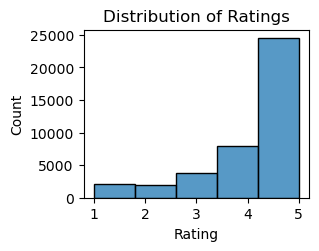

In [7]:
# Histogram of ratings
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='rating', bins=5)
plt.title('Distribution of Ratings', fontsize=12)
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Category')

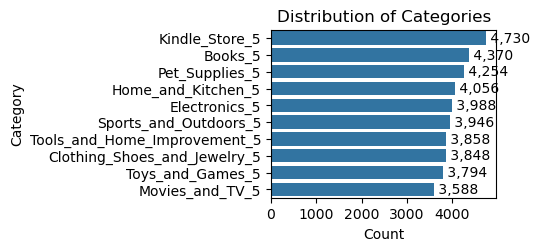

In [8]:
# Understanding the distribution of review categories, this tells me which product categories are most reviewed and helps in identifying trends.
plt.subplot(2, 2, 2)
category_counts = df['category'].value_counts()
ax = sns.barplot(x=category_counts.values, y=category_counts.index)

# Add count labels on the bars
for i, v in enumerate(category_counts.values):
    ax.text(v, i, f' {v:,}', va='center')

plt.title('Distribution of Categories', fontsize=12)
plt.xlabel('Count')
plt.ylabel('Category')

Text(0, 0.5, 'Count')

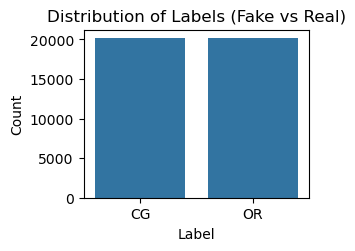

In [12]:
# Checking the distribution of fake (CG) and organic (OR) reviews. If there is a significant imbalance, it could affect the results of any predictive model.
plt.subplot(2, 2, 3)
label_counts = df['label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Labels (Fake vs Real)', fontsize=12)
plt.xlabel('Label')
plt.ylabel('Count')

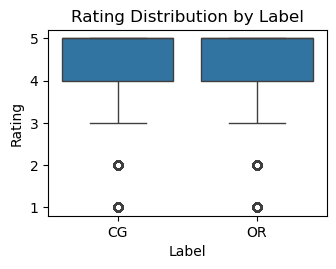

In [14]:
# Box plot of ratings by label
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='label', y='rating')
plt.title('Rating Distribution by Label', fontsize=12)
plt.xlabel('Label')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

In [15]:
# Average rating by category and label
avg_ratings = df.pivot_table(
    values='rating',
    index='category',
    columns='label',
    aggfunc='mean'
).round(2)

print("\nAverage Rating by Category and Label:")
print(avg_ratings)


Average Rating by Category and Label:
label                           CG    OR
category                                
Books_5                       4.22  4.29
Clothing_Shoes_and_Jewelry_5  4.18  4.16
Electronics_5                 4.19  4.15
Home_and_Kitchen_5            4.25  4.24
Kindle_Store_5                4.36  4.39
Movies_and_TV_5               4.17  4.12
Pet_Supplies_5                4.22  4.20
Sports_and_Outdoors_5         4.33  4.30
Tools_and_Home_Improvement_5  4.31  4.31
Toys_and_Games_5              4.36  4.33


In [16]:
# Calculating the percentage of fake reviews by category
fake_pct = (df[df['label'] == 'CG'].groupby('category').size() / 
            df.groupby('category').size() * 100).round(2)
print("\nPercentage of Computer Generated Reviews by Category:")
print(fake_pct)


Percentage of Computer Generated Reviews by Category:
category
Books_5                         50.0
Clothing_Shoes_and_Jewelry_5    50.0
Electronics_5                   50.0
Home_and_Kitchen_5              50.0
Kindle_Store_5                  50.0
Movies_and_TV_5                 50.0
Pet_Supplies_5                  50.0
Sports_and_Outdoors_5           50.0
Tools_and_Home_Improvement_5    50.0
Toys_and_Games_5                50.0
dtype: float64



Text Length Statistics:
count    40432.00
mean       351.27
std        369.81
min         24.00
25%        107.00
50%        198.00
75%        439.00
max       2827.00
Name: text_length, dtype: float64


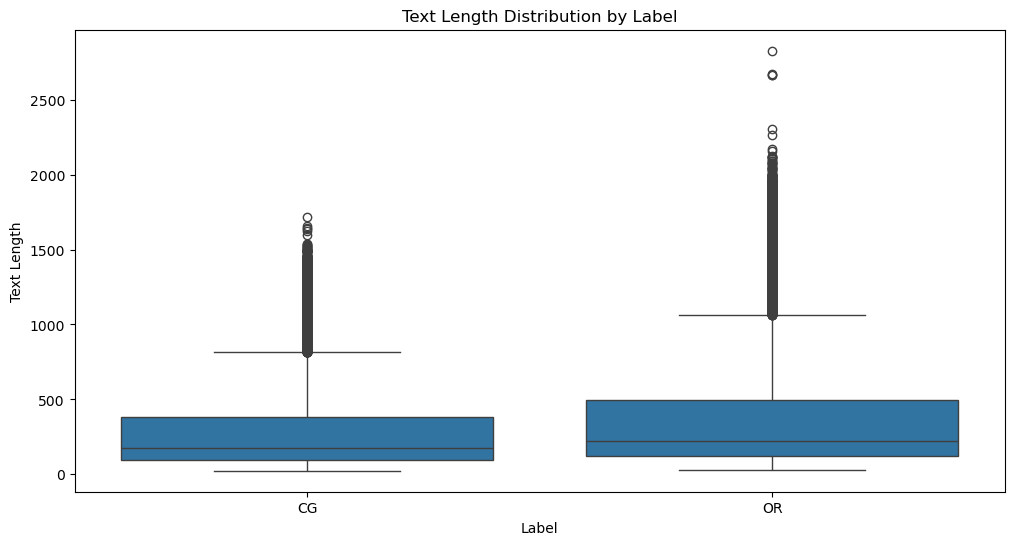

In [17]:
# Text length analysis
df['text_length'] = df['text_'].str.len()
print("\nText Length Statistics:")
print(df['text_length'].describe().round(2))

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='label', y='text_length')
plt.title('Text Length Distribution by Label', fontsize=12)
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

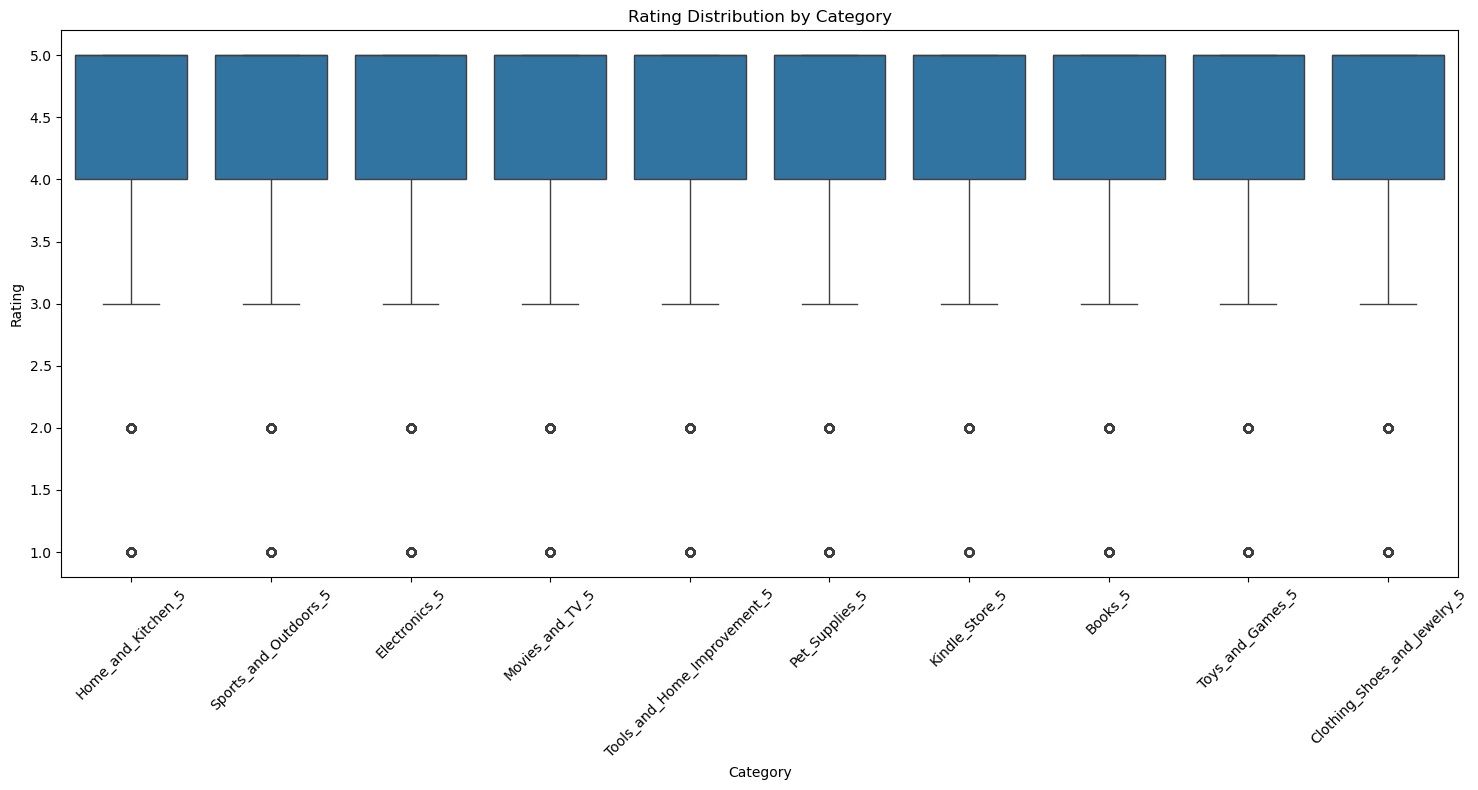

In [18]:
# Rating distribution by category
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='category', y='rating')
plt.xticks(rotation=45)
plt.title('Rating Distribution by Category', fontsize=12)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

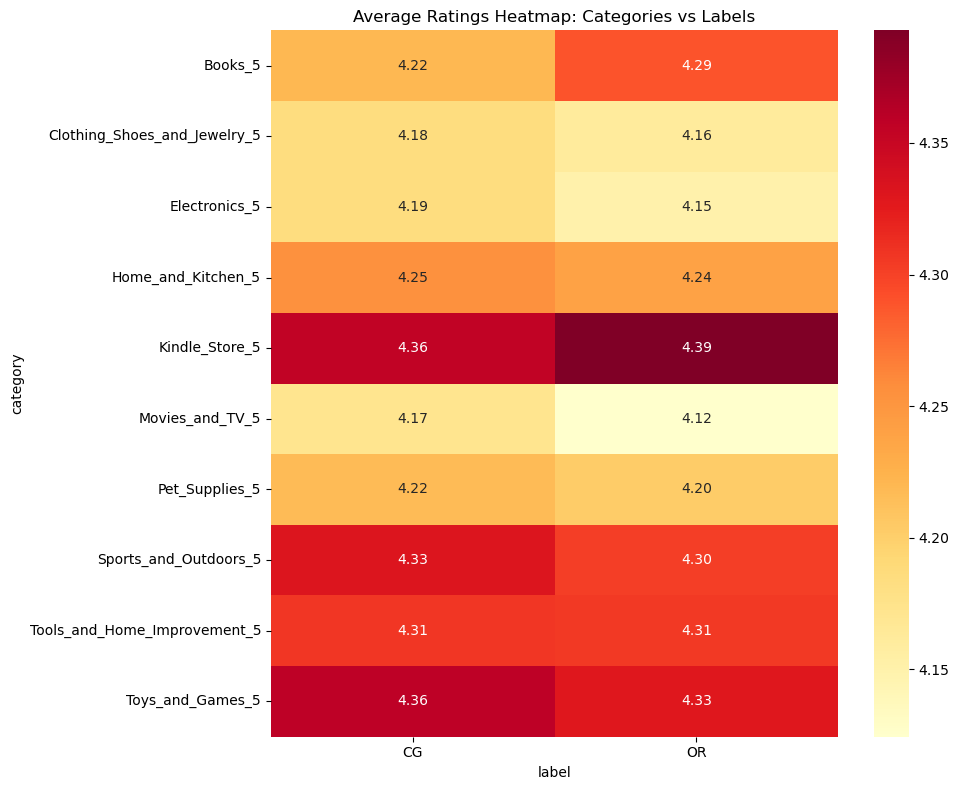

In [19]:
# Creating a heatmap of average ratings
pivot_table = df.pivot_table(values='rating', index='category', columns='label', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Average Ratings Heatmap: Categories vs Labels')
plt.tight_layout()
plt.show()

In [20]:
print("\nKey Insights:")
print(f"1. Average text length for real reviews: {df[df['label']=='OR']['text_length'].mean():.2f}")
print(f"2. Average text length for fake reviews: {df[df['label']=='CG']['text_length'].mean():.2f}")
print(f"3. Overall average rating: {df['rating'].mean():.2f}")
print(f"4. Most common category: {df['category'].mode()[0]}")
print(f"5. Rating correlation with text length: {df['rating'].corr(df['text_length']):.3f}")


Key Insights:
1. Average text length for real reviews: 396.97
2. Average text length for fake reviews: 305.57
3. Overall average rating: 4.26
4. Most common category: Kindle_Store_5
5. Rating correlation with text length: -0.078
